<a href="https://colab.research.google.com/github/gana-sajjala/bhavani/blob/main/Copy_of_heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel('Heart_Disease_Prediction.xlsx')

In [ ]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
dataset.isna().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


<Axes: xlabel='Heart Disease', ylabel='count'>

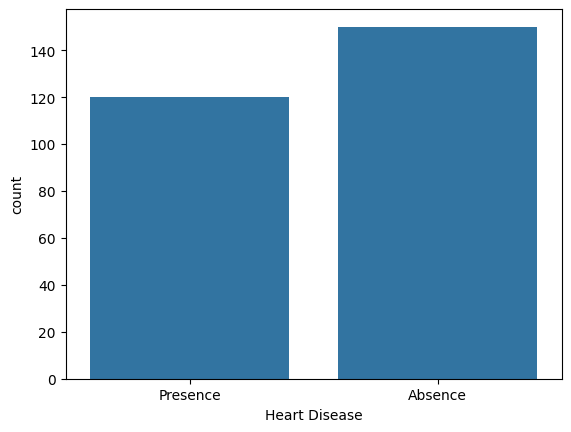

In [ ]:
sns.countplot(x='Heart Disease',data=dataset)

<Axes: >

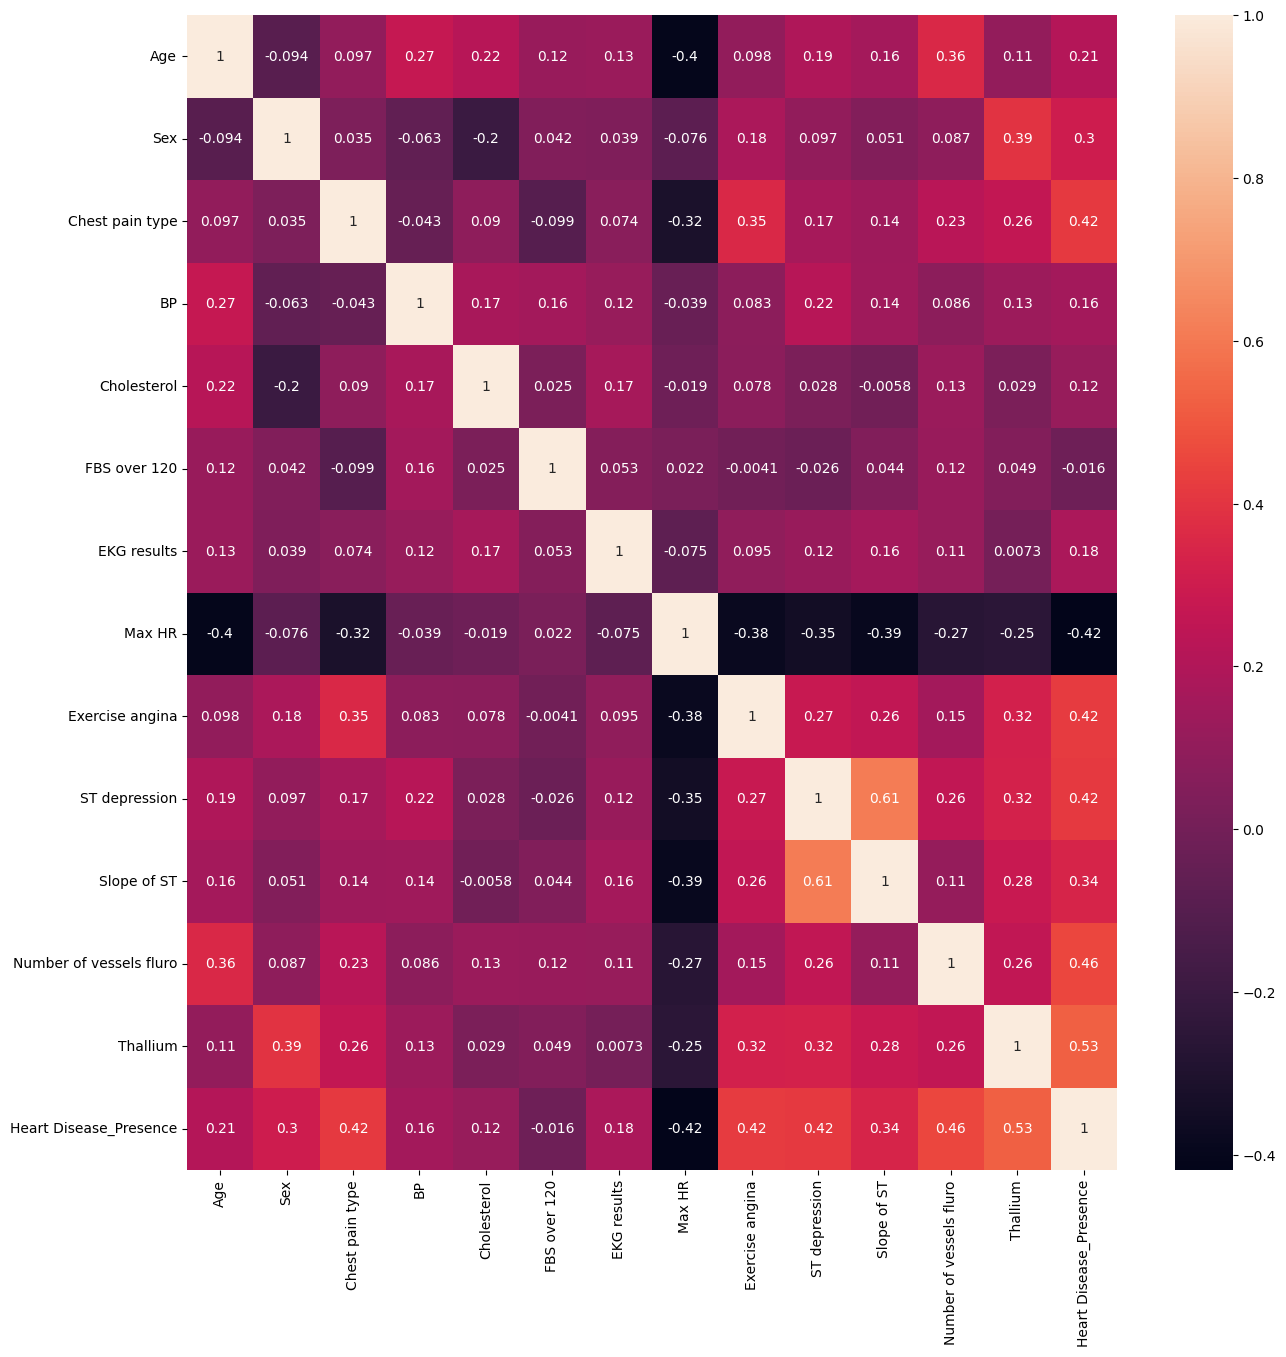

In [ ]:
dataset_encoded = pd.get_dummies(dataset, columns=['Heart Disease'], drop_first=True)
corr_mat = dataset_encoded.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot=True)

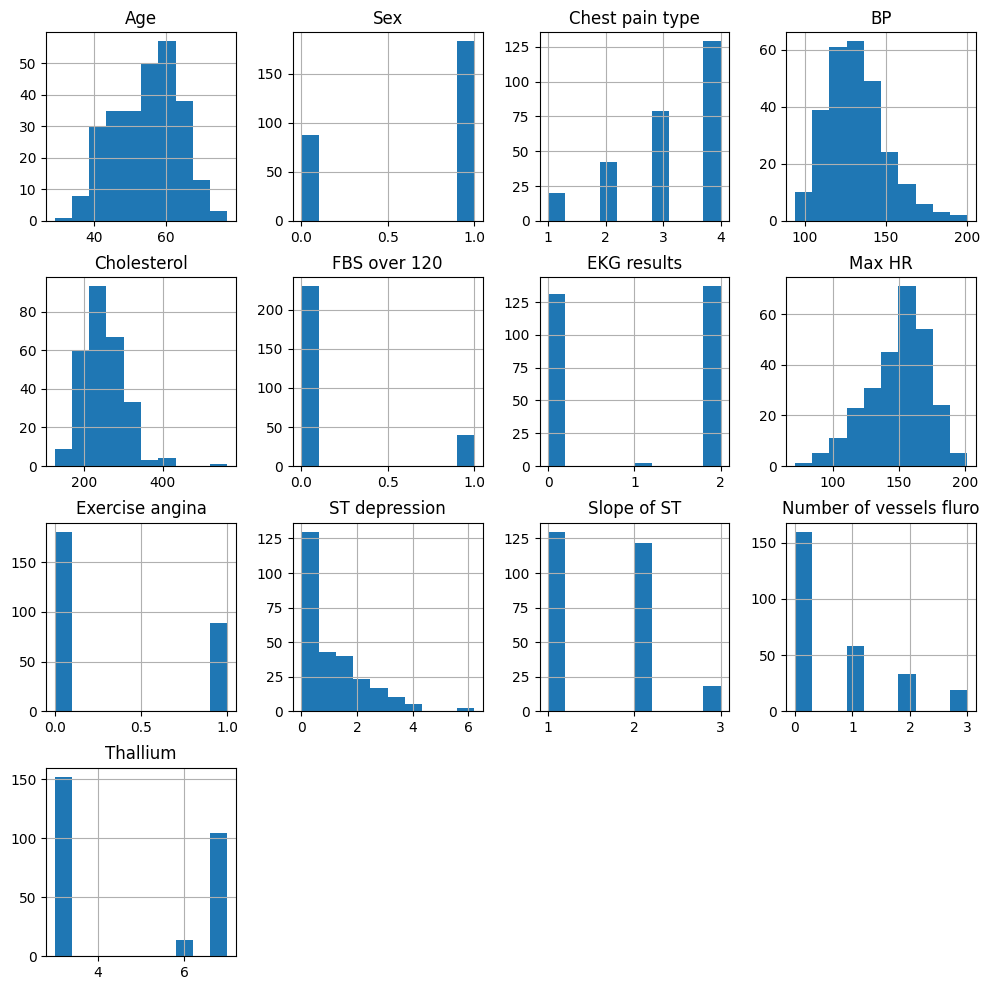

In [ ]:
#plot histogram for each coiumn
dataset.hist(figsize=(12,12))
plt.show()

In [ ]:
dataset2=pd.get_dummies(dataset,columns=['Sex','Chest pain type','BP','Cholesterol','FBS over 120'])

In [ ]:
dataset2.head()

,Age,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Sex_0,...,Cholesterol_353,Cholesterol_354,Cholesterol_360,Cholesterol_394,Cholesterol_407,Cholesterol_409,Cholesterol_417,Cholesterol_564,FBS over 120_0,FBS over 120_1
0,70,2,109,0,2.4,2,3,3,Presence,False,...,False,False,False,False,False,False,False,False,True,False
1,67,2,160,0,1.6,2,0,7,Absence,True,...,False,False,False,False,False,False,False,True,True,False
2,57,0,141,0,0.3,1,0,7,Presence,False,...,False,False,False,False,False,False,False,False,True,False
3,64,0,105,1,0.2,2,1,7,Absence,False,...,False,False,False,False,False,False,False,False,True,False
4,74,2,121,1,0.2,1,1,3,Absence,True,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
cols = [col for col in dataset2.columns if col != 'Heart Disease']

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (x) and target variable (y)
x = dataset2.drop('Heart Disease', axis=1)
y = dataset2['Heart Disease']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
x_train

array([[-1.50496884,  0.95642012,  0.39593402, ..., -0.07053456,
         0.40114778, -0.40114778],
       [ 2.2681268 , -0.04981355, -1.43065883, ..., -0.07053456,
         0.40114778, -0.40114778],
       [ 0.97449401,  0.95642012, -0.21293026, ..., -0.07053456,
         0.40114778, -0.40114778],
       ...,
       [ 0.21987488, -1.05604722,  0.61338555, ..., -0.07053456,
         0.40114778, -0.40114778],
       [-0.42694152, -1.05604722, -0.25642057, ..., -0.07053456,
         0.40114778, -0.40114778],
       [-0.64254698, -1.05604722,  0.61338555, ..., -0.07053456,
         0.40114778, -0.40114778]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
x_test

array([[ 0.21987488,  0.95642012,  0.04801158, ..., -0.07053456,
         0.40114778, -0.40114778],
       [-0.96595518,  0.95642012, -0.21293026, ..., -0.07053456,
         0.40114778, -0.40114778],
       [ 0.11207215, -1.05604722,  1.26574015, ..., -0.07053456,
         0.40114778, -0.40114778],
       ...,
       [-0.42694152,  0.95642012,  1.61366259, ..., -0.07053456,
         0.40114778, -0.40114778],
       [-0.42694152, -1.05604722, -1.12622669, ..., -0.07053456,
         0.40114778, -0.40114778],
       [-1.50496884, -1.05604722, -0.73481393, ..., -0.07053456,
         0.40114778, -0.40114778]])

In [ ]:
y_pred

array(['Presence', 'Absence', 'Absence', 'Absence', 'Presence',
       'Presence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Presence', 'Absence', 'Presence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Absence', 'Absence', 'Absence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Absence', 'Absence', 'Presence',
       'Absence', 'Presence', 'Absence', 'Presence', 'Absence', 'Absence',
       'Presence', 'Absence', 'Presence', 'Absence', 'Absence', 'Absence',
       'Presence', 'Presence', 'Presence', 'Absence'], dtype=object)

<Axes: >

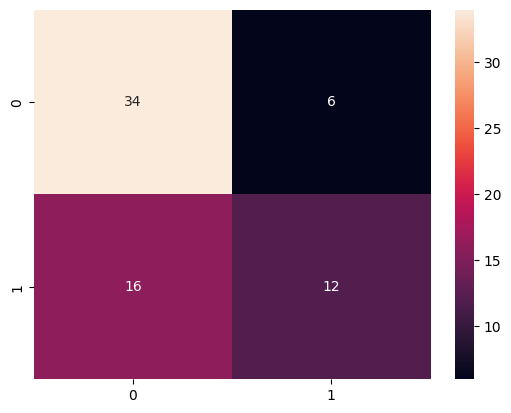

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6764705882352942

In [ ]:
import pickle
pickle.dump(classifier,open('model.pkl','wb'))
pickle.dump(sc,open('sc.pkl','wb'))

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Define the input values
input_data = {
    'Age': 18,
    'Sex': 1,
    'Chest pain type': 2,
    'BP': 90,
    'Cholesterol': 190,
    'FBS over 120': 0,
    'EKG results': 0,
    'Max HR': 78,
    'Exercise angina': 0,
    'ST depression': 3,
    'Slope of ST': 1,
    'Number of vessels fluro': 2,
    'Thallium': 7
}

# Create DataFrame
input_df = pd.DataFrame([input_data])

# One-hot encode categorical features
input_encoded = pd.get_dummies(input_df, columns=['Sex','Chest pain type','BP','Cholesterol','FBS over 120'])

# Note: In a real implementation, you would need to:
# 1. Load your pre-trained model and scaler
# 2. Get the columns from your training data (cols)
# 3. Ensure input_encoded has all columns that the model expects

# For this to work properly, you would need to:
# classifier = joblib.load('heart_disease_model.pkl')
# sc = joblib.load('scaler.pkl')
# cols = joblib.load('training_columns.pkl')

# Then proceed with:
# for col in cols:
#     if col not in input_encoded.columns:
#         input_encoded[col] = 0
# input_encoded = input_encoded[cols]
# input_scaled = sc.transform(input_encoded)
# prediction = classifier.predict(input_scaled)
# print(f"The predicted Heart Disease status is: {prediction[0]}")